##### OvR OvO 逻辑回归处理多分类问题

In [14]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np

In [3]:
Data = datasets.load_iris()
X = Data.data[:,0:2]
y = Data.target

In [5]:
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [22]:
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

/usr/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [23]:
def plot_deciBiOn_boundary(model,axis):
    x0,x1 = np.meshgrid(
        np.linspace(axis[0],axis[1],int((axis[1] - axis[0])*100)).reshape(-1,1),
        np.linspace(axis[2],axis[3],int((axis[3] - axis[2])*100)).reshape(-1,1),
    )
   
    X_new = np.c_[x0.ravel(),x1.ravel()]
    
    print(type(x0.ravel()))
    print(type(x0))
    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(["#EF9A9A","#FFF590","#90CAF9"])
    plt.contourf(x0,x1,zz,cmap=custom_cmap,linewidth=5)


In [24]:
log_reg.score(X_train,y_train)

0.75

In [25]:
log_reg.score(X_test,y_test)

0.8421052631578947

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


/usr/software/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


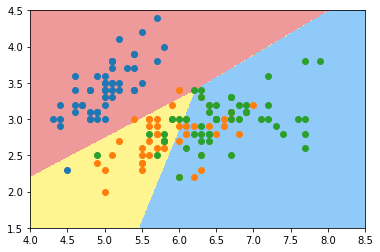

In [26]:
plot_deciBiOn_boundary(log_reg,[4,8.5,1.5,4.5])
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.scatter(X[y==2,0],X[y==2,1])

In [20]:
log_regovo = LogisticRegression(solver='newton-cg',multi_class="multinomial")
log_regovo.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


/usr/software/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


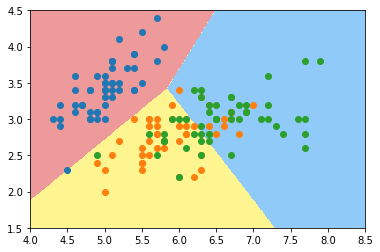

In [21]:
plot_deciBiOn_boundary(log_regovo,[4,8.5,1.5,4.5])
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.scatter(X[y==2,0],X[y==2,1])

#### 使用所有数据进行分类

In [27]:
X = Data.data
y = Data.target
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [28]:
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

/usr/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [29]:
log_reg.score(X_test,y_test)

0.8947368421052632

In [32]:
log_regovo = LogisticRegression(solver='newton-cg',multi_class="multinomial")
log_regovo.fit(X_train,y_train)
log_regovo.score(X_test,y_test)

0.9473684210526315

#### OvR OvO

In [33]:
from sklearn.multiclass import OneVsOneClassifier,OneVsRestClassifier

In [35]:
ovr = OneVsRestClassifier(log_regovo)
ovr.fit(X_train,y_train)
ovr.score(X_test,y_test)

0.8947368421052632